In [1]:
cd src

D:\Python\chess\src


In [2]:
import chess
from trainer import Trainer
from chessbot import ChessBot
import numpy as np
from pystockfish import Engine 

trainer = Trainer()
board = chess.Board()
gruefish = ChessBot()
gruefish2 = ChessBot()
stockfish = Engine(depth=20, param={"Threads": 6})
shitfish = Engine(depth=0, param={"Threads": 6})

Using TensorFlow backend.


0.5 2176


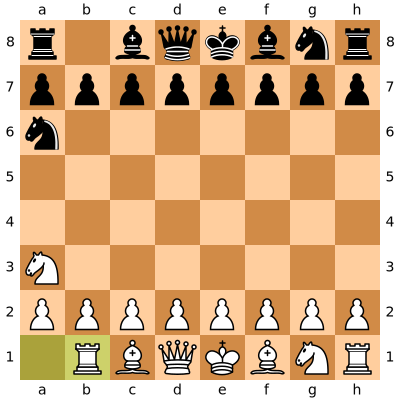

In [5]:
if board.is_game_over():
    print(board.result())
else:
    if board.turn == chess.WHITE:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(gruefish.best_move(board, eval=True, think_time=10))
    else:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(gruefish2.best_move(board, eval=True, think_time=1))

board

In [ ]:
board.pop()

In [3]:
%%timeit

gruefish.count_pieces(board)

10000 loops, best of 3: 67.5 µs per loop


In [4]:
board.reset()
gruefish.clear_cache()

In [3]:
%%timeit

gruefish.clear_cache()
gruefish.best_move(board, depth=3, think_time=999)

1 loop, best of 3: 37.7 s per loop


In [ ]:
board.fen()

In [ ]:
board.set_fen('R7/5k2/8/2p4p/P1p2P1P/2P5/2K2P2/8 w - - 17 47')
board

In [ ]:
chessbot.best_move(board, eval=True)

In [7]:
while not board.is_game_over():
    if board.turn == chess.WHITE:
        board.push(gruefish.best_move(board, eval=True, depth=10, think_time=5))
        #board.push(trainer.best_move(board, filter=True))
    else:
        #board.push(trainer.best_move(board, filter=True))
        board.push(gruefish2.best_move(board, eval=True, depth=10, think_time=25))
print(board.result(), len(board.move_stack))

0.431043
0.45929068327
0.498435
0.589062
0.57268717885
0.367145299911
0.563709
0.645988643169
0.419889
0.422057449818
0.431992
0.642904073
0.0736368
0.926301
0.0388084
0.981196561828
0.0681550502777
0.961279
0.0533972382545
0.610376
0.189202964306
0.83663
0.608868
0.795602351427
0.454037368298
0.712233364582
0.692466
0.175045847893
0.088924407959
0.286158
0.889238931239
0.199111
0.827572152019
0.035372
0.910537
0.644060760736
0.318803
0.241447
0.93023237586
0.0288705
0.758955
0.0795034170151
0.66199311614
0.292618513107
0.981028
0.0259119272232
0.958588350564
0.0189765
0.984806
0.0155231
0.9632
0.0525366663933
0.938597768545


KeyboardInterrupt: 

In [ ]:
len(board.move_stack)

In [44]:
board.reset()

In [ ]:
print(trainer.test_winrate())

In [ ]:
board, won = trainer.play_vs_sunfish(True)

In [3]:
board, won = trainer.play_vs_stockfish(True, shitfish, think_time=500)

0-1 False 38


In [5]:
trainer.train_from_cache()

ResourceExhaustedError: OOM when allocating tensor with shape[40192,2048]
	 [[Node: gradients/MatMul_1_grad/MatMul_1 = MatMul[T=DT_FLOAT, _class=["loc:@MatMul_1"], transpose_a=true, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](cond/Merge, gradients/add_5_grad/Reshape)]]

Caused by op 'gradients/MatMul_1_grad/MatMul_1', defined at:
  File "D:\Program Files\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Program Files\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "D:\Program Files\Anaconda3\lib\site-packages\traitlets\config\application.py", line 653, in launch_instance
    app.start()
  File "D:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "D:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "D:\Program Files\Anaconda3\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "D:\Program Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "D:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "D:\Program Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\Program Files\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2827, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-5c04b6de7da2>", line 1, in <module>
    trainer.train_from_cache()
  File "D:\Python\chess\src\trainer.py", line 336, in train_from_cache
    chessbot.model.train_on_batch(batch_x, batch_y)
  File "D:\Program Files\Anaconda3\lib\site-packages\keras\engine\training.py", line 1319, in train_on_batch
    self._make_train_function()
  File "D:\Program Files\Anaconda3\lib\site-packages\keras\engine\training.py", line 760, in _make_train_function
    self.total_loss)
  File "D:\Program Files\Anaconda3\lib\site-packages\keras\optimizers.py", line 163, in get_updates
    grads = self.get_gradients(loss, params)
  File "D:\Program Files\Anaconda3\lib\site-packages\keras\optimizers.py", line 82, in get_gradients
    grads = K.gradients(loss, params)
  File "D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 1968, in gradients
    return tf.gradients(loss, variables, colocate_gradients_with_ops=True)
  File "D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 482, in gradients
    in_grads = grad_fn(op, *out_grads)
  File "D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py", line 768, in _MatMulGrad
    op.inputs[0], grad, transpose_a=True))
  File "D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1855, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 1454, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

...which was originally created as op 'MatMul_1', defined at:
  File "D:\Program Files\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
[elided 16 identical lines from previous traceback]
  File "D:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-1ca9aa462d79>", line 2, in <module>
    from trainer import Trainer
  File "<frozen importlib._bootstrap>", line 969, in _find_and_load
  File "<frozen importlib._bootstrap>", line 958, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 673, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 665, in exec_module
  File "<frozen importlib._bootstrap>", line 222, in _call_with_frames_removed
  File "D:\Python\chess\src\trainer.py", line 9, in <module>
    chessbot = ChessBot()
  File "D:\Python\chess\src\chessbot.py", line 15, in __init__
    self.model = get_model()
  File "D:\Python\chess\src\model_conv.py", line 54, in get_model
    out = d1(out)
  File "D:\Program Files\Anaconda3\lib\site-packages\keras\engine\topology.py", line 572, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "D:\Program Files\Anaconda3\lib\site-packages\keras\engine\topology.py", line 635, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "D:\Program Files\Anaconda3\lib\site-packages\keras\engine\topology.py", line 166, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "D:\Program Files\Anaconda3\lib\site-packages\keras\layers\core.py", line 814, in call
    output = K.dot(x, self.W)
  File "D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 827, in dot
    out = tf.matmul(x, y)

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[40192,2048]
	 [[Node: gradients/MatMul_1_grad/MatMul_1 = MatMul[T=DT_FLOAT, _class=["loc:@MatMul_1"], transpose_a=true, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](cond/Merge, gradients/add_5_grad/Reshape)]]


In [ ]:
print(won)

In [6]:
temp_board = chess.Board()
move_num = 0

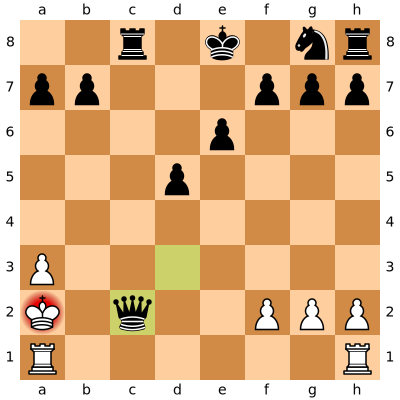

In [45]:
if len(board.move_stack) > move_num:
    temp_board.push(board.move_stack[move_num])
    move_num += 1

temp_board

In [ ]:
#file = open("ficsgamesdb_2016_standard2000_nomovetimes_1435145.pgn")
file = open("ficsgamesdb_2016_chess_nomovetimes_1445486.pgn")

In [ ]:
game = chess.pgn.read_game(file)
board = game.end().board()

In [ ]:
game.headers['Result']

In [ ]:
trainer.train_from_match(board, game.headers['Result'])

In [ ]:
cd src

In [ ]:
from model_conv import model

In [ ]:
board.reset()
board.push(chess.Move.from_uci('c2c4'))
trainer.best_move(board, eval=True)


board.push(chess.Move.from_uci('g8f6'))
print(board)

In [ ]:
batch_x = np.zeros(shape=(1, 8, 8, 12), dtype=np.int8)
batch_x[0] = chessbot.board_to_matrix(board)
model.predict_proba(batch_x)

In [ ]:
stockfish.setfenposition('rnb1k2r/ppq2ppp/4p3/3p4/3P4/2bBPN2/P1P2PPP/3Q1RK1 b kq - 1 11')
stockfish.bestmove()